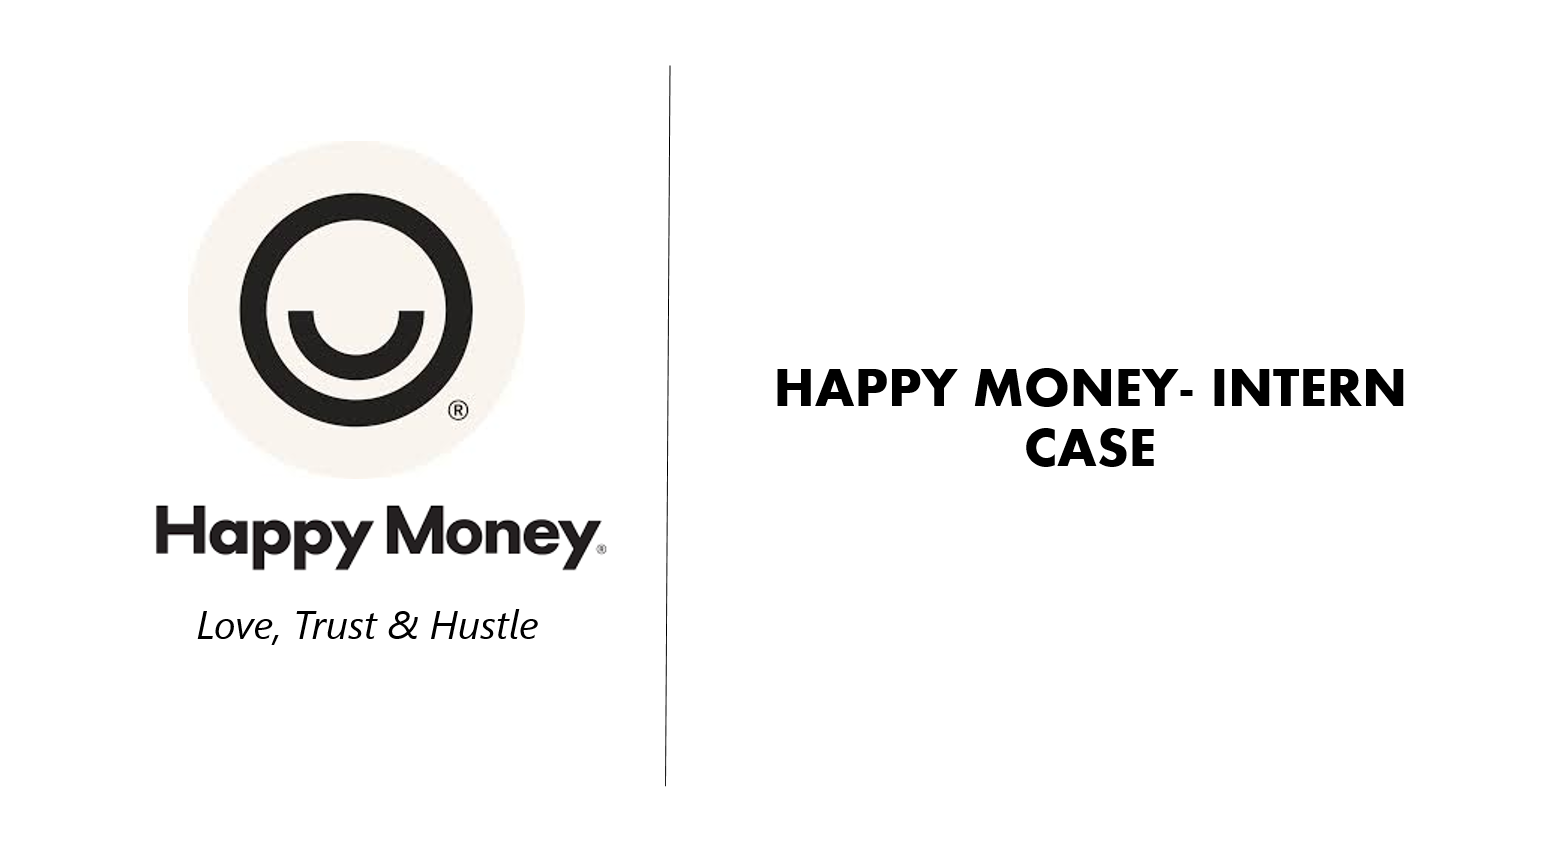

Happy Money Case - Anirudha Balkrishna

In [52]:
#IMPORTING REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [53]:
#LOAD THE DATA
from google.colab import files
print('\nUpload the Risk Dataset file')
file = files.upload()
df = pd.read_csv("risk_dataset.csv")



Upload the Risk Dataset file


Saving risk_dataset.csv to risk_dataset (4).csv


In [54]:
#EXPLORE THE DATA

df.head(5)


,Unnamed: 0,ID,FicoScore,CustomScore1,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
0,1,0123ca88-b4ae-4dfa-a647-3d59955af8b2,646,0.318988,0.290841,14701,1,100000,0
1,2,8a5cd764-f2a8-4f2d-b936-e22f46c74cba,646,0.229145,0.230242,16300,1,115000,0
2,3,a4706386-9fe4-49e0-a92b-7901d752670c,741,0.059483,0.037298,13827,0,83000,0
3,4,31ead444-e33e-437a-b481-6c5fafbdb755,772,0.068970,0.063600,15612,2,108000,0
4,5,afe8dc16-8865-4156-9d4c-f2825e2645c5,724,0.077304,0.085119,37588,1,82000,0


In [55]:
df = df.drop(["Unnamed: 0"],axis="columns")
df.describe()

,FicoScore,CustomScore1,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
count,95633.000000,95633.000000,95633.000000,95633.000000,95633.000000,95633.000000,95633.000000
mean,695.772850,0.150160,0.132196,15853.039045,0.779344,74493.041607,0.113068
std,38.739602,0.106321,0.111487,14037.265130,1.311809,48073.894022,0.316677
min,620.000000,0.009894,0.004201,-3.000000,0.000000,1.000000,0.000000
25%,668.000000,0.076755,0.055359,6907.000000,0.000000,47000.000000,0.000000
50%,692.000000,0.120925,0.100279,12342.000000,0.000000,64000.000000,0.000000
75%,720.000000,0.191725,0.172429,20578.000000,1.000000,89000.000000,0.000000
max,850.000000,0.864869,0.921332,570409.000000,61.000000,998000.000000,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95633 entries, 0 to 95632
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     95633 non-null  object 
 1   FicoScore              95633 non-null  int64  
 2   CustomScore1           95633 non-null  float64
 3   CustomScore2           95633 non-null  float64
 4   CreditCardBalance      95633 non-null  int64  
 5   InquriesInLast6Months  95633 non-null  int64  
 6   IncomeAnnual           95633 non-null  int64  
 7   BadFlag                95633 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 5.8+ MB


There are no missing values in the dataset, so we can proceed with finding relations amongst variables (& the target variable)

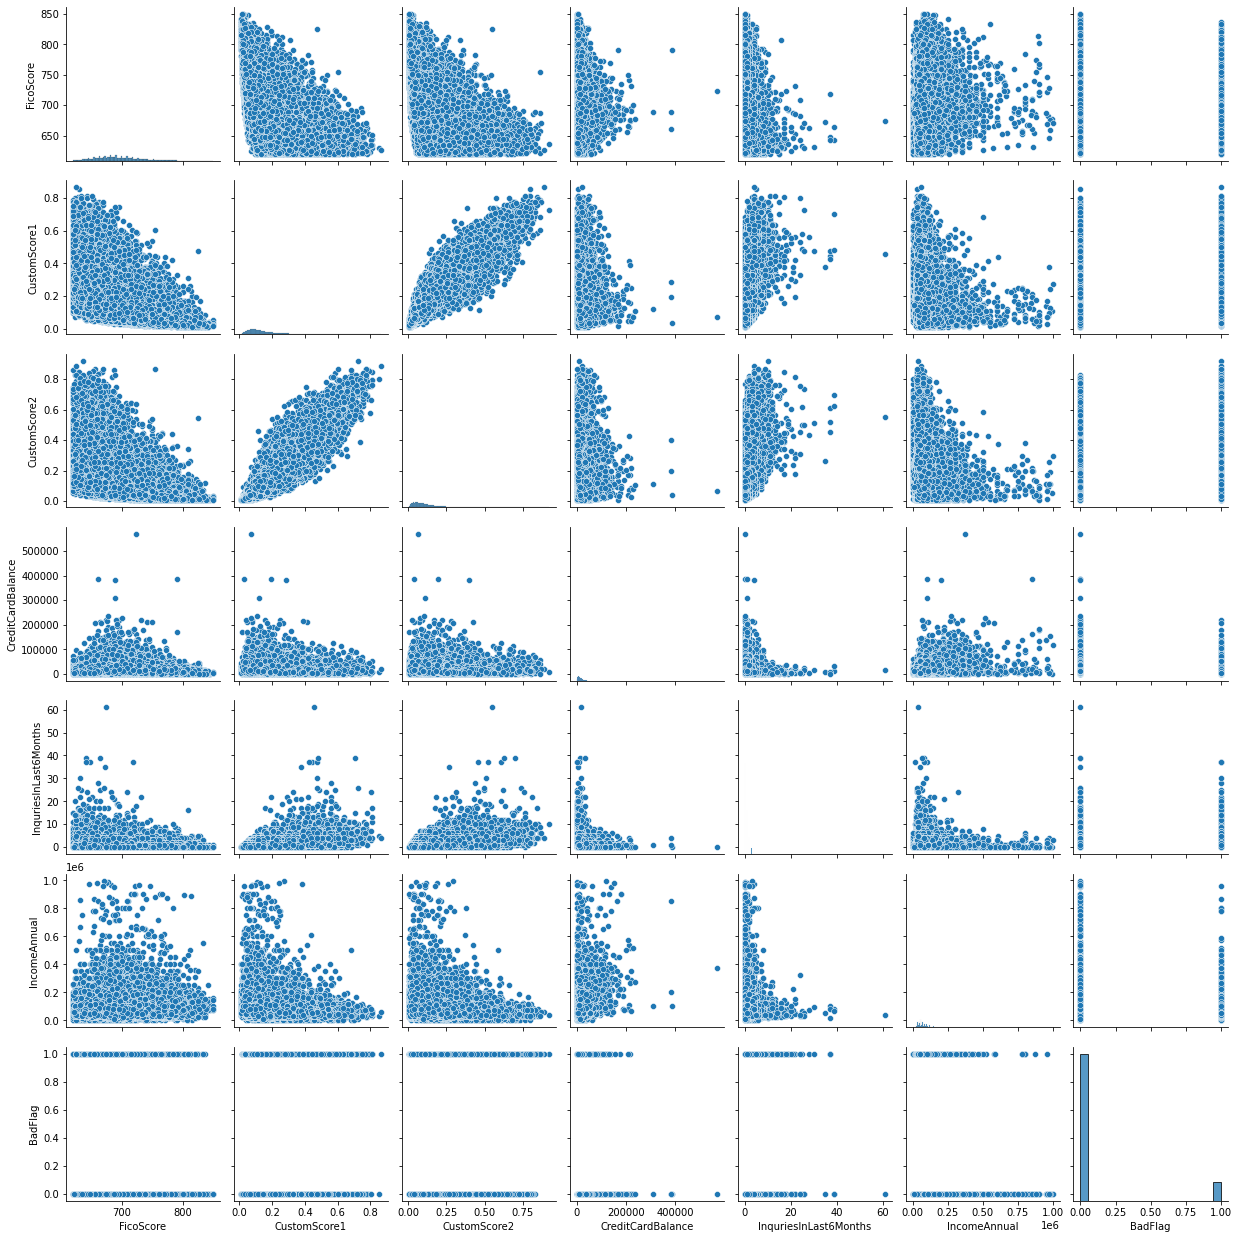

In [57]:

sns.pairplot(df)

In order to check the importance of various features to predict the target variable, we can employ multiple analytical tools like Regression, Decision trees, Random Forests, XG Boost, K-nearest neighbours etc.

Since the problem at hand is a Classification problem, I will employ 2 techniques - 
1. Decision Trees
2. Random Forest

In [58]:
#DEFINE THE FEATURES & TARGETS
df = df.drop(columns='ID')
features = df.drop(columns='BadFlag')
targets = pd.DataFrame(df['BadFlag'])
feature_names = features.columns
print(feature_names)
print(targets.shape)

Index(['FicoScore', 'CustomScore1', 'CustomScore2', 'CreditCardBalance',
       'InquriesInLast6Months', 'IncomeAnnual'],
      dtype='object')
(95633, 1)


Feature: 0, Score: 0.14270
Feature: 1, Score: 0.18864
Feature: 2, Score: 0.29818
Feature: 3, Score: 0.18100
Feature: 4, Score: 0.04662
Feature: 5, Score: 0.14286


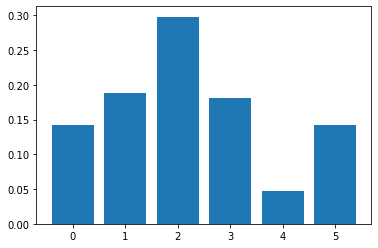

array([[84820,     0],
       [    0, 10813]])

In [59]:
#DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(features, targets)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
#plt.xticks([0,1,2,3,4,5],feature_names)
plt.show()

# checking accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
pred = model.predict(features)
confusion_matrix(targets,pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: 0, Score: 0.14525
Feature: 1, Score: 0.22707
Feature: 2, Score: 0.24224
Feature: 3, Score: 0.18784
Feature: 4, Score: 0.04761
Feature: 5, Score: 0.15000


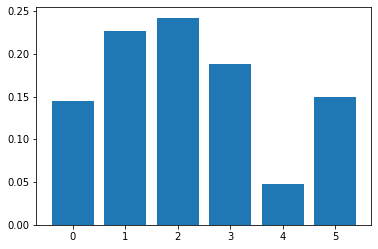

array([[84820,     0],
       [    3, 10810]])

In [60]:
#RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
# define the model
model2 = RandomForestClassifier()
# fit the model
model2.fit(features, targets)
# get importance
importance = model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

from sklearn.metrics import confusion_matrix
pred = model2.predict(features)
confusion_matrix(targets,pred)